In [25]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [26]:
data = pd.read_csv('/content/Data.csv')
data.head(10)

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0
5,ID00006,1.018709,0.07,0.519231,C6,13051,3,C2,M4,Diesel,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
6,ID00007,0.097992,0.16,0.403846,C7,6112,4,B2,M5,Diesel,...,No,Yes,Yes,Yes,No,No,Yes,Yes,5,0
7,ID00008,0.509085,0.14,0.423077,C8,8794,1,B2,M6,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
8,ID00009,0.282394,0.07,0.298077,C7,6112,3,C2,M4,Diesel,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
9,ID00010,0.566255,0.04,0.442308,C9,17804,1,B2,M7,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,0,0


# Data Preprocessing

In [27]:
data.shape

(58592, 44)

In [28]:
data.duplicated().sum()

0

In [29]:
data.isnull().sum()

policy_id                           0
policy_tenure                       0
age_of_car                          0
age_of_policyholder                 0
area_cluster                        0
population_density                  0
make                                0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
gear_box                            0
steering_type                       0
turning_radius                      0
length      

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  object 
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  object 
 8   model                             58592 non-null  object 
 9   fuel_type                         58592 non-null  object 
 10  max_torque                        58592 non-null  object 
 11  max_power                         58592 non-null  object 
 12  engi

In [31]:
data.columns

Index(['policy_id', 'policy_tenure', 'age_of_car', 'age_of_policyholder',
       'area_cluster', 'population_density', 'make', 'segment', 'model',
       'fuel_type', 'max_torque', 'max_power', 'engine_type', 'airbags',
       'is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type', 'displacement', 'cylinder',
       'transmission_type', 'gear_box', 'steering_type', 'turning_radius',
       'length', 'width', 'height', 'gross_weight', 'is_front_fog_lights',
       'is_rear_window_wiper', 'is_rear_window_washer',
       'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
       'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert', 'ncap_rating', 'is_claim'],
      dtype='object')

<Axes: >

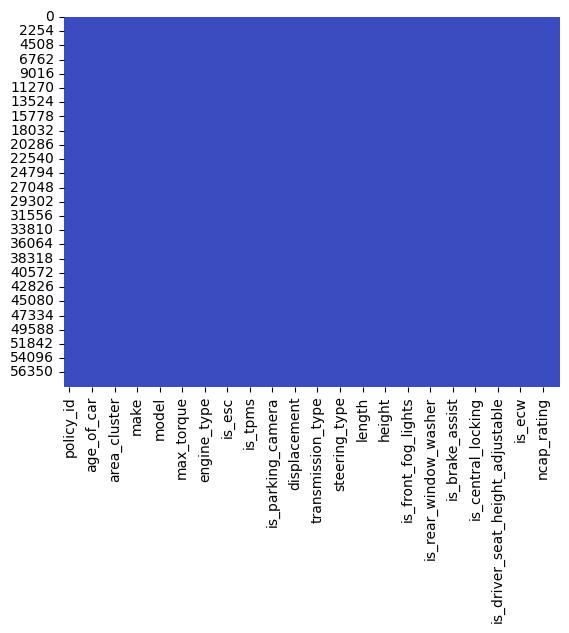

In [32]:

sns.heatmap(data.isnull(), cmap='coolwarm', cbar = False)

In [33]:
data.describe() # we can check for outliers by describe (simple (check the mean and median value))

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,displacement,cylinder,gear_box,turning_radius,length,width,height,gross_weight,ncap_rating,is_claim
count,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.00000,58592.000000,58592.000000,58592.000000
mean,0.611246,0.069424,0.469420,18826.858667,1.763722,3.137066,1162.355851,3.626963,5.245443,4.852893,3850.476891,1672.233667,1553.33537,1385.276813,1.759950,0.063968
std,0.414156,0.056721,0.122886,17660.174792,1.136988,1.832641,266.304786,0.483616,0.430353,0.228061,311.457119,112.089135,79.62227,212.423085,1.389576,0.244698
min,0.002735,0.000000,0.288462,290.000000,1.000000,1.000000,796.000000,3.000000,5.000000,4.500000,3445.000000,1475.000000,1475.00000,1051.000000,0.000000,0.000000
25%,0.210250,0.020000,0.365385,6112.000000,1.000000,2.000000,796.000000,3.000000,5.000000,4.600000,3445.000000,1515.000000,1475.00000,1185.000000,0.000000,0.000000
50%,0.573792,0.060000,0.451923,8794.000000,1.000000,2.000000,1197.000000,4.000000,5.000000,4.800000,3845.000000,1735.000000,1530.00000,1335.000000,2.000000,0.000000
75%,1.039104,0.110000,0.548077,27003.000000,3.000000,6.000000,1493.000000,4.000000,5.000000,5.000000,3995.000000,1755.000000,1635.00000,1510.000000,3.000000,0.000000
max,1.396641,1.000000,1.000000,73430.000000,5.000000,6.000000,1498.000000,4.000000,6.000000,5.200000,4300.000000,1811.000000,1825.00000,1720.000000,5.000000,1.000000


# Outliers using z-score and boxplot

In [34]:
from scipy import stats

# select only numeric column
numeric_col = data.select_dtypes(include=['int64','float64'])

z_score = np.abs(stats.zscore(numeric_col))

outiler = (z_score > 3) | (z_score < -3)

print(np.sum(outiler,axis=1))

0        0
1        0
2        0
3        0
4        0
        ..
58587    0
58588    0
58589    0
58590    0
58591    0
Length: 58592, dtype: int64


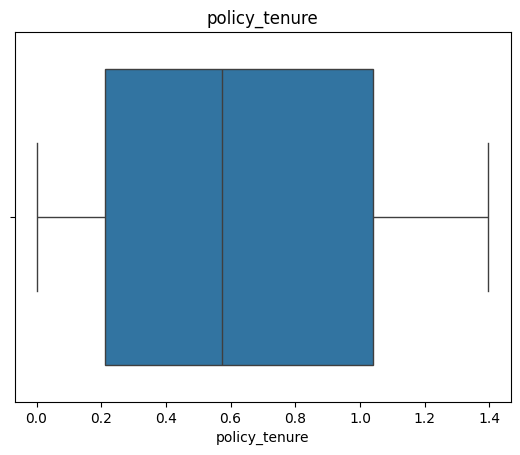

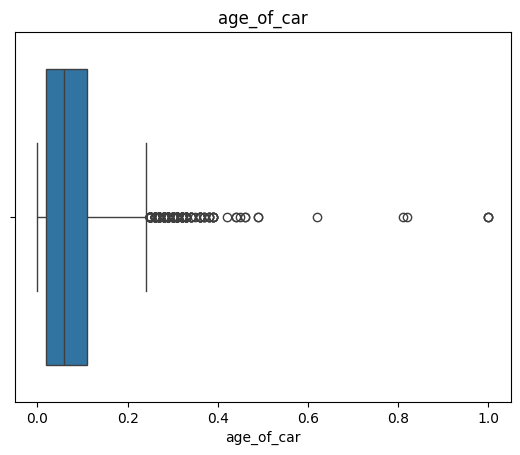

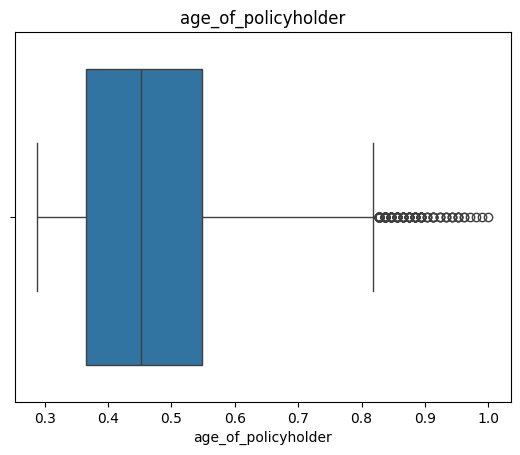

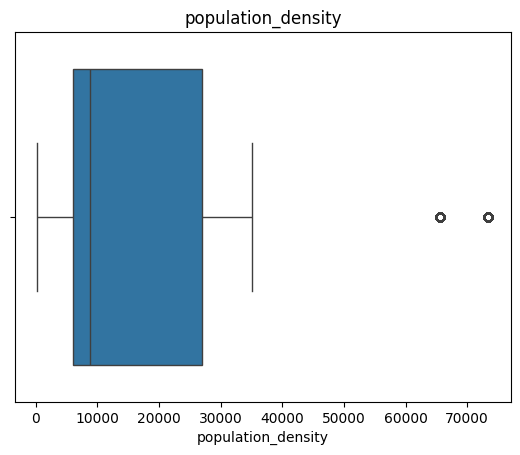

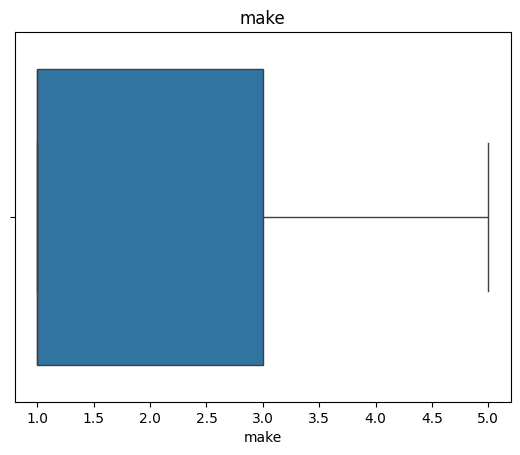

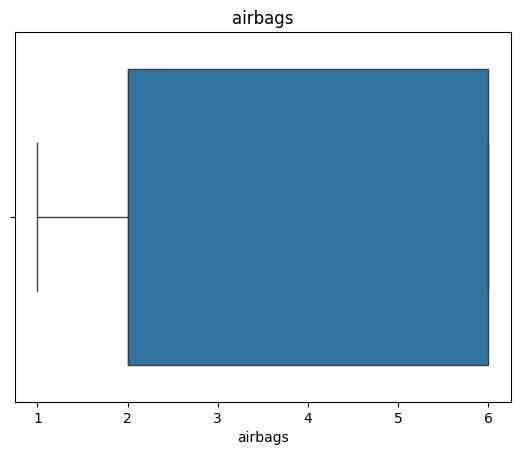

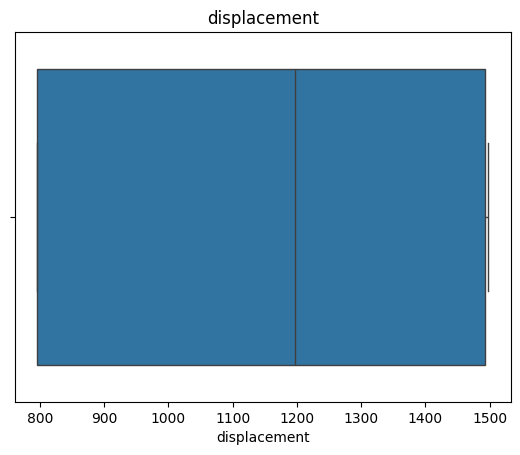

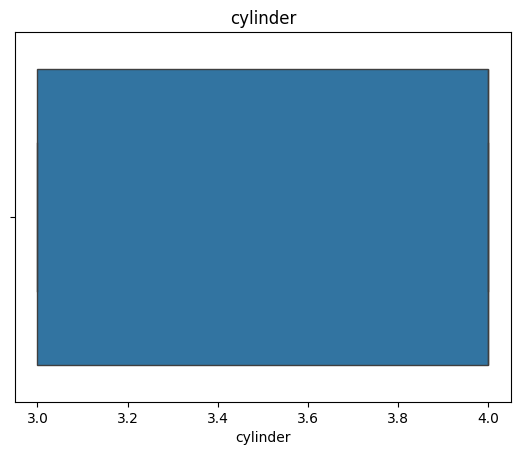

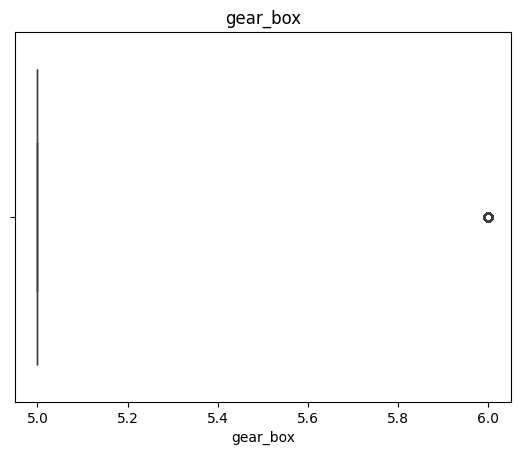

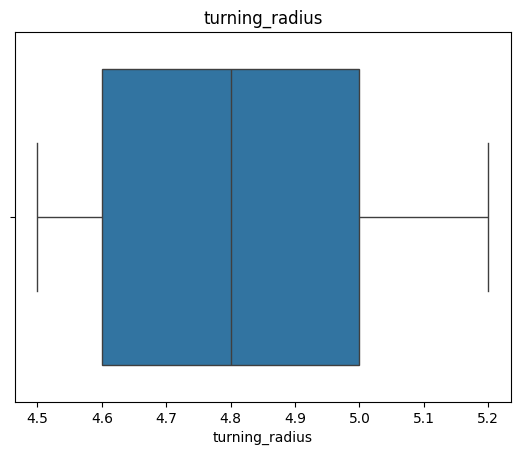

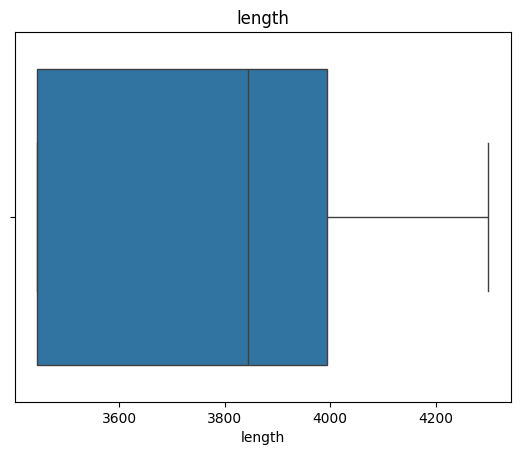

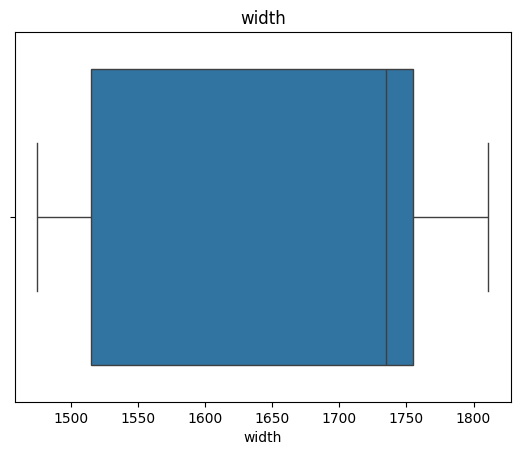

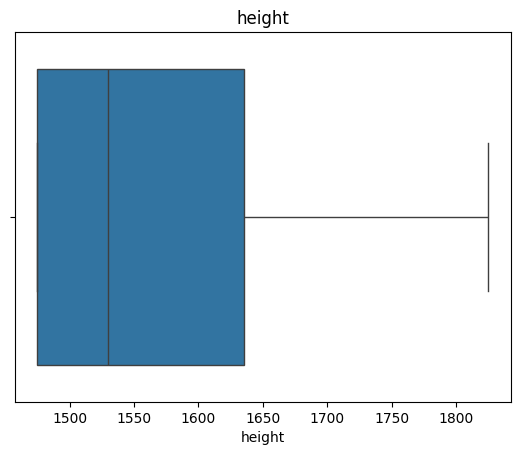

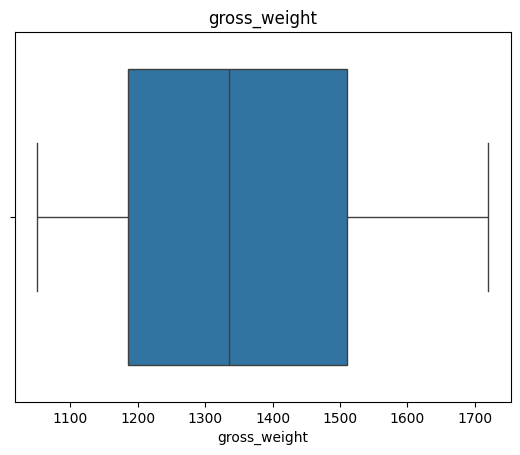

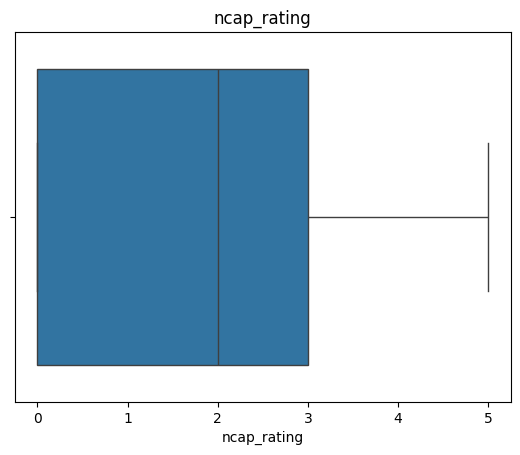

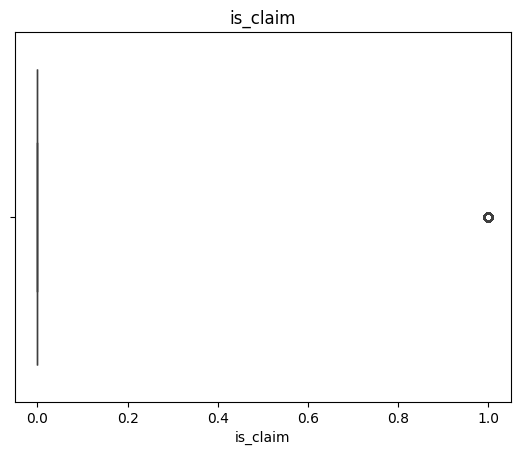

In [35]:
    # Checking for Outliers using boxplot

    def boxplots(col):
        sns.boxplot(data[col], orient='h')
        plt.title(col)
        plt.show()

    for i in list(data.select_dtypes(exclude=['object']).columns)[0:]:
        boxplots(i)

In [36]:
# removing the outlier

def remove_outlier(data, column):
    Q1,Q3 = np.percentile(data[column], [25,75])
    IQR = Q3 - Q1
    LL = Q1 - (1.5 * IQR)
    UL = Q3 + (1.5 * IQR)
    return data[(data[column] >= LL) & (data[column] <= UL)]

columns_to_process = ['age_of_car', 'age_of_policyholder', 'population_density']

cleaned_data = data.copy()
for i in columns_to_process:
    cleaned_data = remove_outlier(cleaned_data, i)

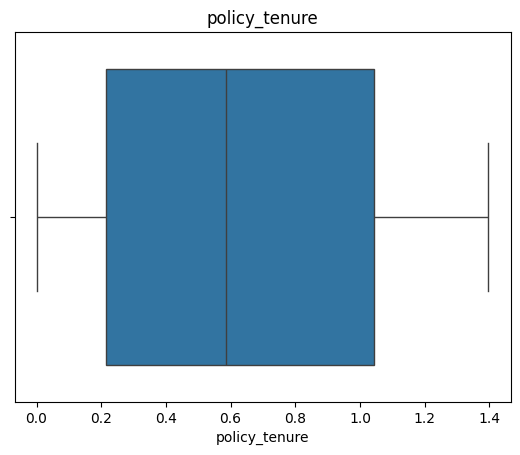

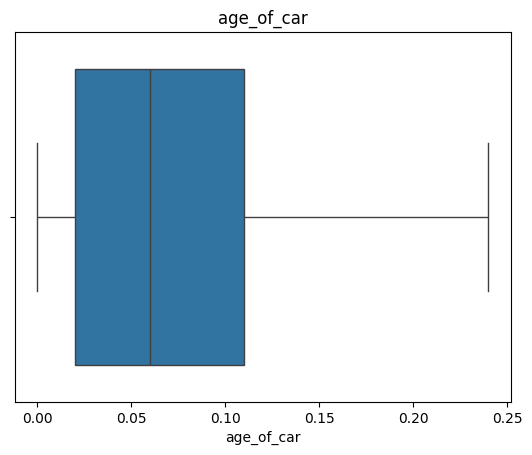

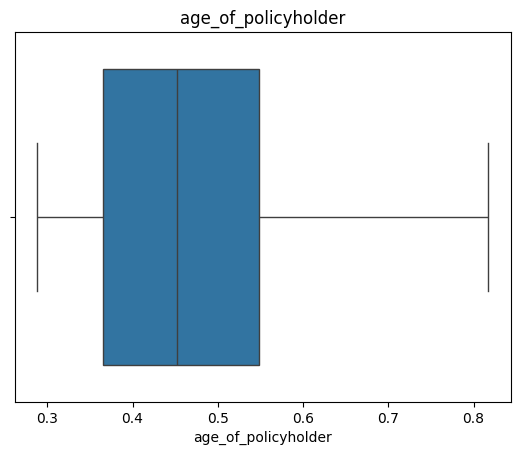

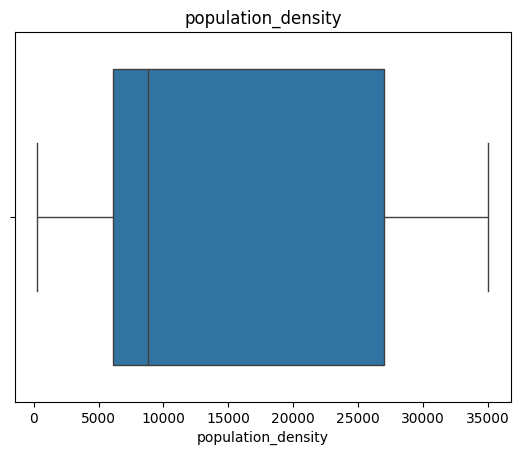

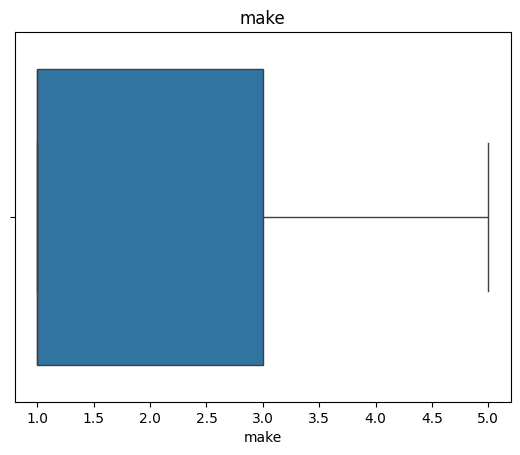

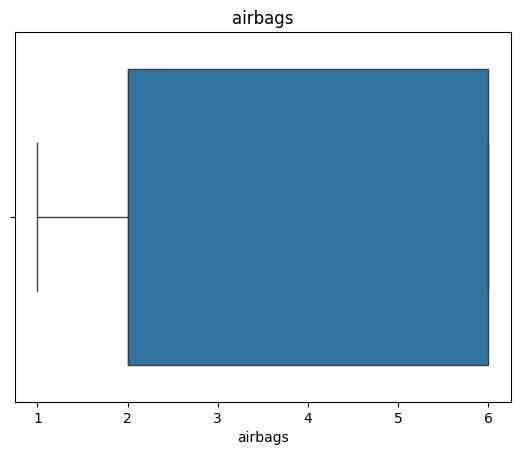

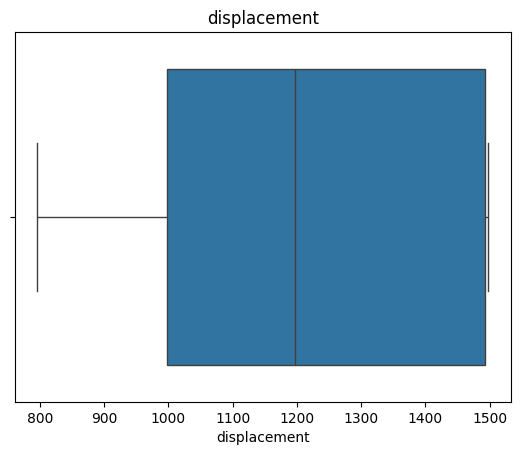

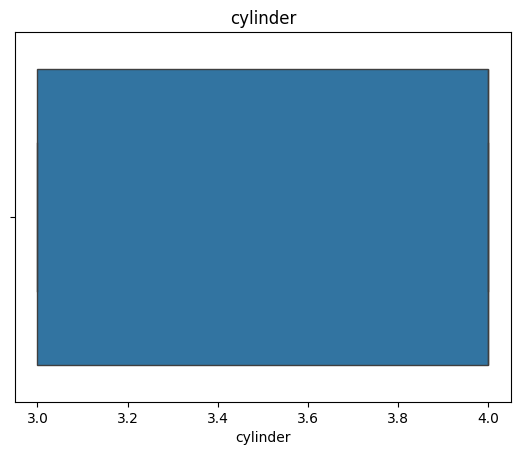

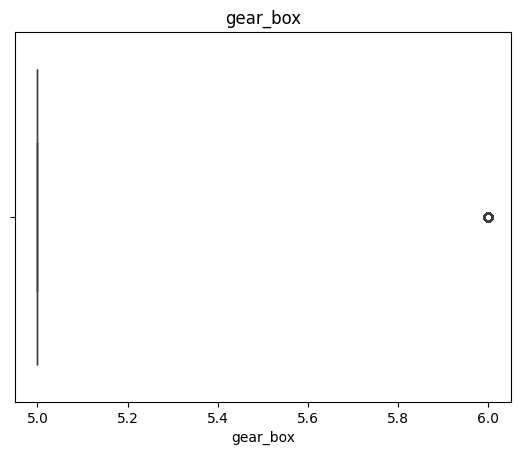

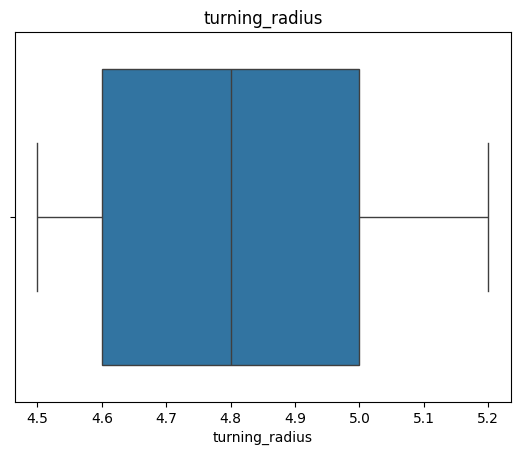

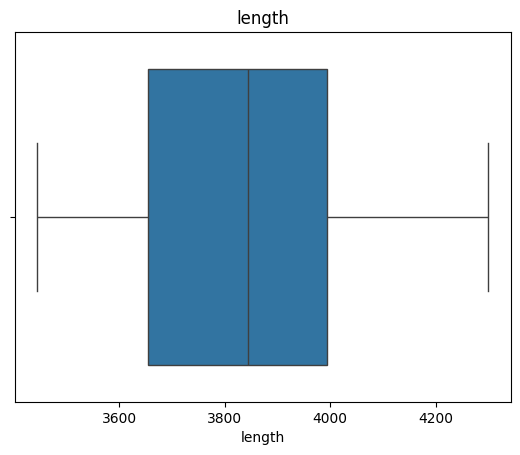

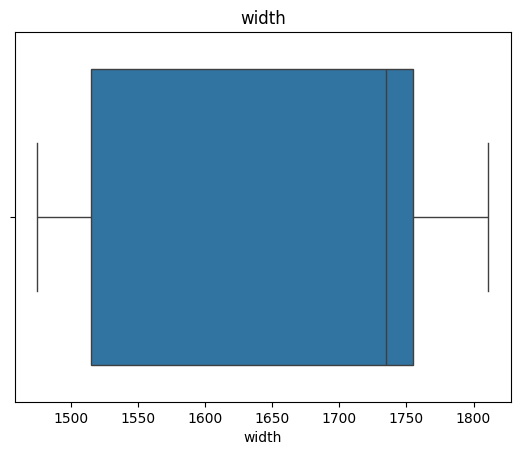

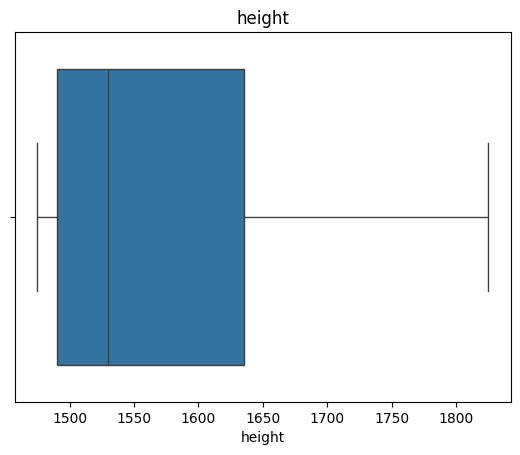

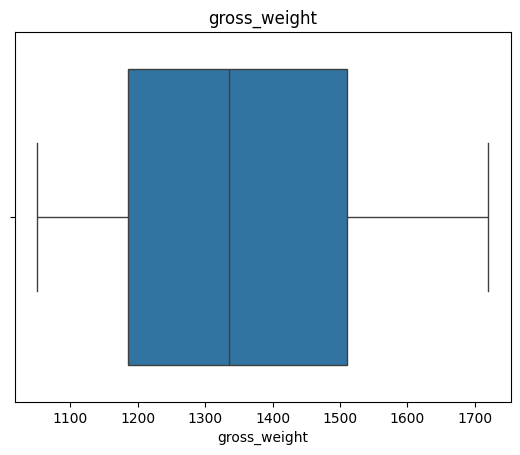

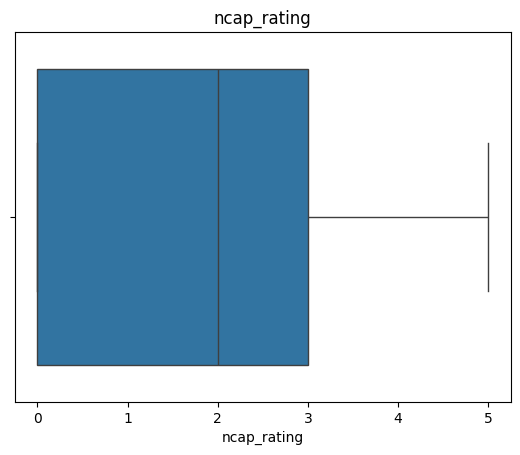

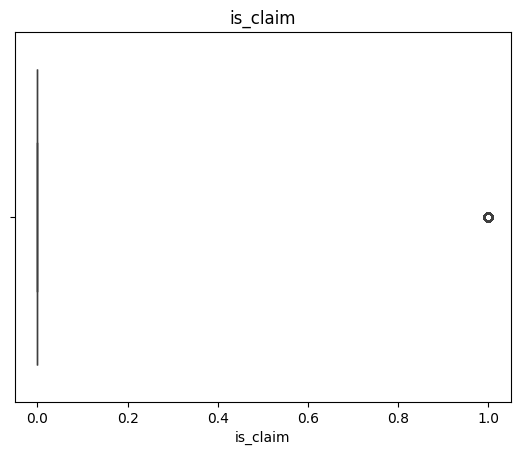

In [37]:
def boxplots(col):
    sns.boxplot(cleaned_data[col], orient='h')
    plt.title(col)
    plt.show()

numeric_col = cleaned_data.select_dtypes(include=['int64','float64']).columns.tolist()

for i in numeric_col:
    boxplots(i)

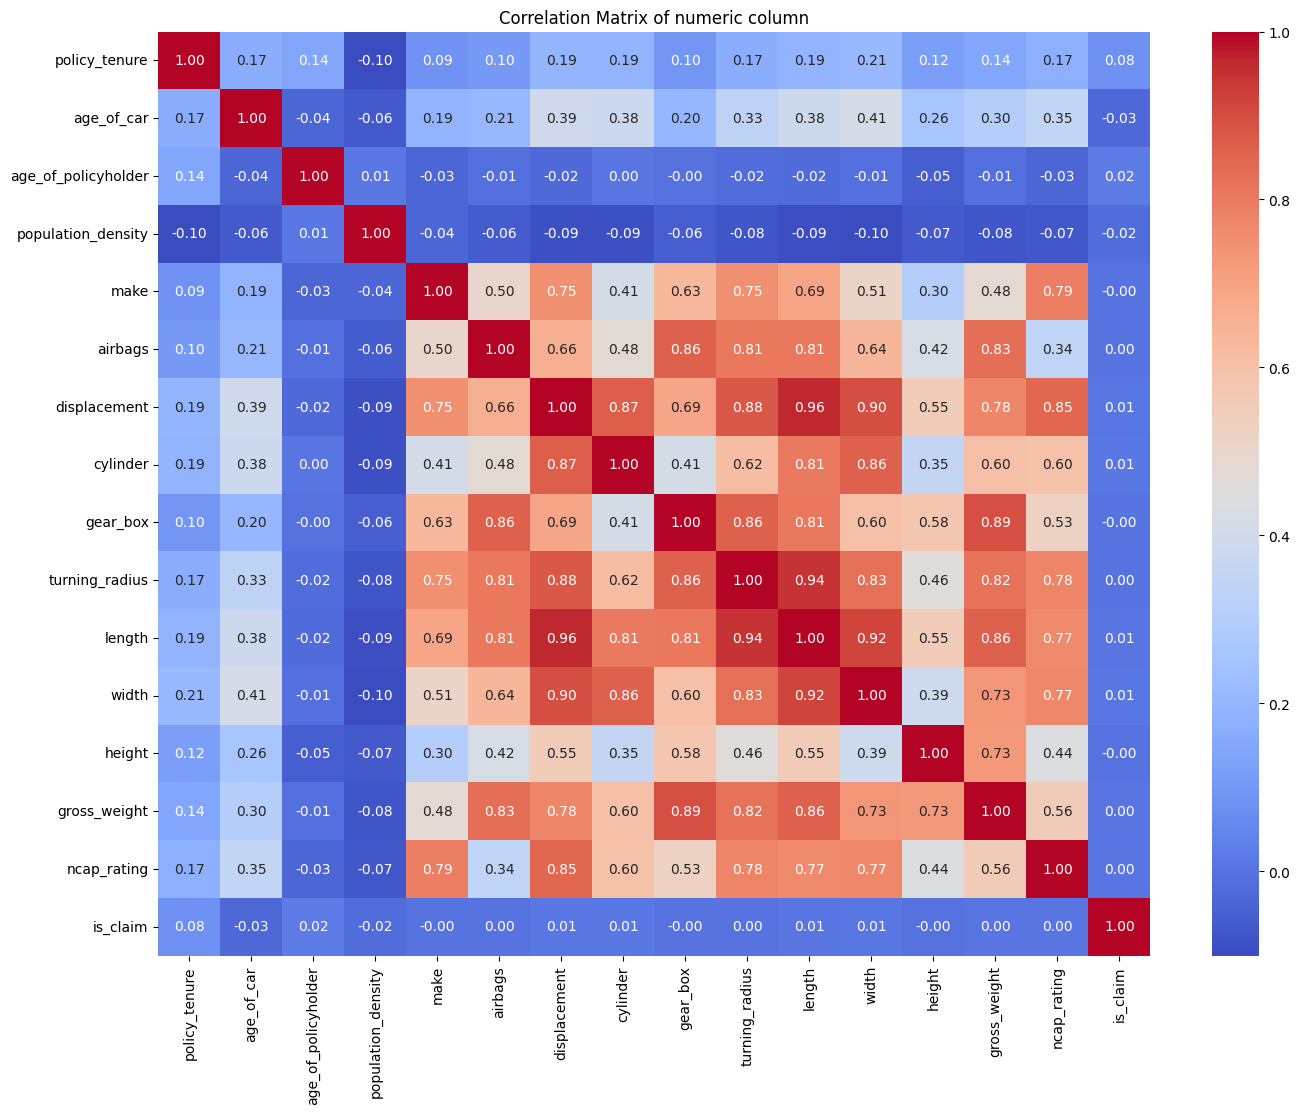

In [38]:
# Check for correlation

numeric_col = data.select_dtypes(include=['int64','float64'])

corr = numeric_col.corr()

plt.figure(figsize=(16,12))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Correlation Matrix of numeric column")
plt.show()

# Feature Engineering

In [39]:
# we don't want the id so we drop it
data = data.drop('policy_id', axis=1)

In [40]:
data.head()

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,...,No,No,No,Yes,No,No,No,Yes,0,0
1,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,...,No,No,No,Yes,No,No,No,Yes,0,0
2,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,60Nm@3500rpm,...,No,No,No,Yes,No,No,No,Yes,0,0
3,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,113Nm@4400rpm,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,91Nm@4250rpm,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


In [41]:
# now we have an issue with max_torque and max_power where both has numbers as well as char(so we are gonna split it)
import re

data[['torque_value','torque_rpm']] = data['max_torque'].str.extract(r'(\d+\.\d+|\d+).+?(\d+)rpm').astype(float)
data[['power_value','power_rpm']] = data['max_power'].str.extract(r'(\d+\.\d+|\d+).+?(\d+)rpm').astype(float)

# drop the existing column as we no longer need them
data = data.drop(['max_torque', 'max_power'], axis=1)

# Check the extracted values
print(data[['torque_value', 'torque_rpm', 'power_value', 'power_rpm']].head())

   torque_value  torque_rpm  power_value  power_rpm
0          60.0      3500.0        40.36     6000.0
1          60.0      3500.0        40.36     6000.0
2          60.0      3500.0        40.36     6000.0
3         113.0      4400.0        88.50     6000.0
4          91.0      4250.0        67.06     5500.0


### Spliting the columns into nominal and binary

In [42]:
binary_columns = [
    'is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
    'is_parking_camera', 'is_front_fog_lights', 'is_rear_window_wiper',
    'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist',
    'is_power_door_locks', 'is_central_locking', 'is_power_steering',
    'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
    'is_ecw', 'is_speed_alert'
]

In [43]:
nominal_columns = [
    'area_cluster', 'make', 'segment', 'model', 'fuel_type',
    'engine_type', 'rear_brakes_type', 'transmission_type', 'steering_type',
]

## Applying LabelEncoding to the binary values

In [44]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()



text_data_feature = [i for i in list(binary_columns) if i not in list(data.describe().columns)]

print('Label Encoding Transform')
print("********"*5)
for i in text_data_feature:
    data[i] = le.fit_transform(data[i])
    print(i, ' : ', data[i].unique(), ' = ', le.inverse_transform(data[i].unique()))

Label Encoding Transform
****************************************
is_esc  :  [0 1]  =  ['No' 'Yes']
is_adjustable_steering  :  [0 1]  =  ['No' 'Yes']
is_tpms  :  [0 1]  =  ['No' 'Yes']
is_parking_sensors  :  [1 0]  =  ['Yes' 'No']
is_parking_camera  :  [0 1]  =  ['No' 'Yes']
is_front_fog_lights  :  [0 1]  =  ['No' 'Yes']
is_rear_window_wiper  :  [0 1]  =  ['No' 'Yes']
is_rear_window_washer  :  [0 1]  =  ['No' 'Yes']
is_rear_window_defogger  :  [0 1]  =  ['No' 'Yes']
is_brake_assist  :  [0 1]  =  ['No' 'Yes']
is_power_door_locks  :  [0 1]  =  ['No' 'Yes']
is_central_locking  :  [0 1]  =  ['No' 'Yes']
is_power_steering  :  [1 0]  =  ['Yes' 'No']
is_driver_seat_height_adjustable  :  [0 1]  =  ['No' 'Yes']
is_day_night_rear_view_mirror  :  [0 1]  =  ['No' 'Yes']
is_ecw  :  [0 1]  =  ['No' 'Yes']
is_speed_alert  :  [1 0]  =  ['Yes' 'No']


## Applying OneHotEncoding to the nominal values  

In [45]:
data = pd.get_dummies(data, columns=nominal_columns, drop_first=True)
print("shape of the encoding :", data.shape)

shape of the encoding : (58592, 92)


In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 92 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   policy_tenure                          58592 non-null  float64
 1   age_of_car                             58592 non-null  float64
 2   age_of_policyholder                    58592 non-null  float64
 3   population_density                     58592 non-null  int64  
 4   airbags                                58592 non-null  int64  
 5   is_esc                                 58592 non-null  int64  
 6   is_adjustable_steering                 58592 non-null  int64  
 7   is_tpms                                58592 non-null  int64  
 8   is_parking_sensors                     58592 non-null  int64  
 9   is_parking_camera                      58592 non-null  int64  
 10  displacement                           58592 non-null  int64  
 11  cy

In [47]:
data.describe()

,policy_tenure,age_of_car,age_of_policyholder,population_density,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,...,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim,torque_value,torque_rpm,power_value,power_rpm
count,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,...,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000
mean,0.611246,0.069424,0.469420,18826.858667,3.137066,0.314053,0.606329,0.239248,0.959500,0.390634,...,0.585251,0.380308,0.724246,0.993805,1.759950,0.063968,134.450937,3533.176031,78.976765,5307.163094
std,0.414156,0.056721,0.122886,17660.174792,1.832641,0.464142,0.488568,0.426628,0.197131,0.487897,...,0.492683,0.485467,0.446897,0.078467,1.389576,0.244698,73.146794,725.960661,27.699259,916.770819
min,0.002735,0.000000,0.288462,290.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,1750.000000,40.360000,3600.000000
25%,0.210250,0.020000,0.365385,6112.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,60.000000,2750.000000,40.360000,4000.000000
50%,0.573792,0.060000,0.451923,8794.000000,2.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,1.000000,1.000000,2.000000,0.000000,113.000000,3500.000000,88.500000,6000.000000
75%,1.039104,0.110000,0.548077,27003.000000,6.000000,1.000000,1.000000,0.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,3.000000,0.000000,200.000000,4400.000000,97.890000,6000.000000
max,1.396641,1.000000,1.000000,73430.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000,250.000000,4400.000000,118.360000,6000.000000


In [48]:
# Convert boolean columns to integers (0 and 1)
boolean_columns = data.select_dtypes(include=['bool']).columns

for col in boolean_columns:
    data[col] = data[col].astype(int)


# Verify the final changes
print("\nModified DataFrame head:")
print("="*50)
print(data.head())

print("\nFinal columns in the DataFrame:")
print("="*50)
print(data.columns)


Modified DataFrame head:
   policy_tenure  age_of_car  age_of_policyholder  population_density  \
0       0.515874        0.05             0.644231                4990   
1       0.672619        0.02             0.375000               27003   
2       0.841110        0.02             0.384615                4076   
3       0.900277        0.11             0.432692               21622   
4       0.596403        0.11             0.634615               34738   

   airbags  is_esc  is_adjustable_steering  is_tpms  is_parking_sensors  \
0        2       0                       0        0                   1   
1        2       0                       0        0                   1   
2        2       0                       0        0                   1   
3        2       1                       1        0                   1   
4        2       0                       0        0                   0   

   is_parking_camera  ...  engine_type_1.5 Turbocharged Revotron  \
0               

In [49]:
data.head()

,policy_tenure,age_of_car,age_of_policyholder,population_density,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,...,engine_type_1.5 Turbocharged Revotron,engine_type_F8D Petrol Engine,engine_type_G12B,engine_type_K Series Dual jet,engine_type_K10C,engine_type_i-DTEC,rear_brakes_type_Drum,transmission_type_Manual,steering_type_Manual,steering_type_Power
0,0.515874,0.05,0.644231,4990,2,0,0,0,1,0,...,0,1,0,0,0,0,1,1,0,1
1,0.672619,0.02,0.375000,27003,2,0,0,0,1,0,...,0,1,0,0,0,0,1,1,0,1
2,0.841110,0.02,0.384615,4076,2,0,0,0,1,0,...,0,1,0,0,0,0,1,1,0,1
3,0.900277,0.11,0.432692,21622,2,1,1,0,1,1,...,0,0,0,0,0,0,1,0,0,0
4,0.596403,0.11,0.634615,34738,2,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


## splitting into feature and target

In [50]:
x = data.drop('is_claim', axis=1)
y = data['is_claim']

x.head()

,policy_tenure,age_of_car,age_of_policyholder,population_density,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,...,engine_type_1.5 Turbocharged Revotron,engine_type_F8D Petrol Engine,engine_type_G12B,engine_type_K Series Dual jet,engine_type_K10C,engine_type_i-DTEC,rear_brakes_type_Drum,transmission_type_Manual,steering_type_Manual,steering_type_Power
0,0.515874,0.05,0.644231,4990,2,0,0,0,1,0,...,0,1,0,0,0,0,1,1,0,1
1,0.672619,0.02,0.375000,27003,2,0,0,0,1,0,...,0,1,0,0,0,0,1,1,0,1
2,0.841110,0.02,0.384615,4076,2,0,0,0,1,0,...,0,1,0,0,0,0,1,1,0,1
3,0.900277,0.11,0.432692,21622,2,1,1,0,1,1,...,0,0,0,0,0,0,1,0,0,0
4,0.596403,0.11,0.634615,34738,2,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [51]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: is_claim, dtype: int64

In [52]:
print("Shape of x:", x.shape)
print("Shape of y:", y.shape)

Shape of x: (58592, 91)
Shape of y: (58592,)


# Imbalance Dataset

In [53]:
data['is_claim'].value_counts()

is_claim
0    54844
1     3748
Name: count, dtype: int64

# Splitting Data Into Train and Test

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
# split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### Handle Imbalance data

In [56]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x_train_res, y_train_res = smote.fit_resample(x_train, y_train)

###  Feature Scaling

In [57]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_res_scaled = scaler.fit_transform(x_train_res)
x_test_scaled = scaler.transform(x_test)

# MODELS

In [81]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Model Training LogisticRegression

In [69]:
log_reg = LogisticRegression()
log_reg.fit(x_train_res_scaled, y_train_res)

LogisticRegression()

In [70]:
y_pred_log = log_reg.predict(x_test_scaled)

In [71]:
print('='*50)
print('Accuracy :', accuracy_score(y_test, y_pred_log))
print('='*50)
print('Classification Report :')
print(classification_report(y_test, y_pred_log))
print('='*50)
print('Confusion Matrix :')
print(confusion_matrix(y_test, y_pred_log))

Accuracy : 0.5899820803822852
Classification Report :
              precision    recall  f1-score   support

           0       0.95      0.59      0.73     10963
           1       0.08      0.55      0.15       756

    accuracy                           0.59     11719
   macro avg       0.52      0.57      0.44     11719
weighted avg       0.89      0.59      0.69     11719

Confusion Matrix :
[[6501 4462]
 [ 343  413]]


# Model Training SVC

In [72]:
svc_model = SVC(kernel='rbf', C=1, gamma='auto')
svc_model.fit(x_train_res_scaled, y_train_res)

SVC(C=1, gamma='auto')

In [73]:
y_pred_svm = svc_model.predict(x_test_scaled)

In [74]:
print('='*50)
print('Accuracy :', accuracy_score(y_test, y_pred_svm))
print('='*50)
print('Classification Report :')
print(classification_report(y_test, y_pred_svm))
print('='*50)
print('Confusion Matrix :')
print(confusion_matrix(y_test, y_pred_svm))

Accuracy : 0.5262394402252752
Classification Report :
              precision    recall  f1-score   support

           0       0.95      0.52      0.67     10963
           1       0.08      0.65      0.15       756

    accuracy                           0.53     11719
   macro avg       0.52      0.58      0.41     11719
weighted avg       0.90      0.53      0.64     11719

Confusion Matrix :
[[5679 5284]
 [ 268  488]]


# Model Training XGBClassifier

In [75]:
xgb = XGBClassifier()
xgb.fit(x_train_res_scaled, y_train_res)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [76]:
y_pred_xgb = xgb.predict(x_test_scaled)

In [77]:
print('='*50)
print('Accuracy :', accuracy_score(y_test, y_pred_xgb))
print('='*50)
print('Classification Report :')
print(classification_report(y_test, y_pred_xgb))
print('='*50)
print('Confusion Matrix :')
print(confusion_matrix(y_test, y_pred_xgb))

Accuracy : 0.9266148988821572
Classification Report :
              precision    recall  f1-score   support

           0       0.94      0.99      0.96     10963
           1       0.15      0.03      0.05       756

    accuracy                           0.93     11719
   macro avg       0.54      0.51      0.51     11719
weighted avg       0.89      0.93      0.90     11719

Confusion Matrix :
[[10836   127]
 [  733    23]]


# Model Training Gaussian naive_bayes

In [78]:
gnb = GaussianNB()
gnb.fit(x_train_res_scaled, y_train_res)

GaussianNB()

In [79]:
y_pred_gnb = gnb.predict(x_test_scaled)

In [80]:
print('='*50)
print('Accuracy :', accuracy_score(y_test, y_pred_gnb))
print('='*50)
print('Classification Report :')
print(classification_report(y_test, y_pred_gnb))
print('='*50)
print('Confusion Matrix :')
print(confusion_matrix(y_test, y_pred_gnb))

Accuracy : 0.2785220581960918
Classification Report :
              precision    recall  f1-score   support

           0       0.94      0.24      0.39     10963
           1       0.07      0.78      0.12       756

    accuracy                           0.28     11719
   macro avg       0.50      0.51      0.26     11719
weighted avg       0.89      0.28      0.37     11719

Confusion Matrix :
[[2672 8291]
 [ 164  592]]


# Model Training RandomForestClassifier

In [59]:
model = RandomForestClassifier(n_estimators=100, random_state=42)

# performing cross-validation
from sklearn.model_selection import cross_val_score
cv_score = cross_val_score(model, x_train_res_scaled, y_train_res, cv=5, scoring='accuracy')
print("Cross-validation scores:", cv_score)
print("Mean accuracy:", cv_score.mean())

model.fit(x_train_res_scaled, y_train_res)

Cross-validation scores: [0.86691734 0.91927306 0.91966727 0.91664768 0.91744531]
Mean accuracy: 0.9079901300091751


RandomForestClassifier(random_state=42)

In [60]:
y_pred = model.predict(x_test_scaled)

In [61]:
print('='*50)
print('Accuracy :', accuracy_score(y_test, y_pred))
print('='*50)
print('Classification Report :')
print(classification_report(y_test, y_pred))
print('='*50)
print('Confusion Matrix :')
print(confusion_matrix(y_test, y_pred))

Accuracy : 0.8557897431521461
Classification Report :
              precision    recall  f1-score   support

           0       0.94      0.90      0.92     10963
           1       0.09      0.14      0.11       756

    accuracy                           0.86     11719
   macro avg       0.52      0.52      0.52     11719
weighted avg       0.88      0.86      0.87     11719

Confusion Matrix :
[[9920 1043]
 [ 647  109]]


In [ ]:
# Accuracy : 0.8557897431521461 (This was the accuracy i got without cross-validation)
#  still there is no changes in Accuracy : 0.8557897431521461 (so let's try Feature Selection)

# Model Training RandomForestClassifier with feature selection part  - (recursive feature technique)

In [64]:
from sklearn.feature_selection import RFE

rf_model = RandomForestClassifier()
rfe_model = RFE(estimator=rfe_model, n_features_to_select=11, step=1)
rfe_model.fit(x_train_res_scaled, y_train_res)

x_train_rfe = rfe_model.transform(x_train_res_scaled)
x_test_rfe = rfe_model.transform(x_test_scaled)

rf_model.fit(x_train_rfe, y_train_res)

RandomForestClassifier()

In [66]:
y_pred_rfe = rf_model.predict(x_test_rfe)

In [67]:
print('='*50)
print('Accuracy :', accuracy_score(y_test, y_pred_rfe))
print('='*50)
print('Classification Report :')
print(classification_report(y_test, y_pred_rfe))
print('='*50)
print('Confusion Matrix :')
print(confusion_matrix(y_test, y_pred_rfe))

Accuracy : 0.8764399692806554
Classification Report :
              precision    recall  f1-score   support

           0       0.94      0.93      0.93     10963
           1       0.09      0.10      0.10       756

    accuracy                           0.88     11719
   macro avg       0.51      0.52      0.51     11719
weighted avg       0.88      0.88      0.88     11719

Confusion Matrix :
[[10195   768]
 [  680    76]]


In [ ]:
# so now we got better accuracy than previous one Accuracy : 0.8764399692806554
